# Skew in Regression Analysis

This notebook demonstrates the impact of a skewed target variable on linear regression and explores the use of log transformation to address it.

## Imports

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from random import randint

## 1. Create a Mock Dataset

We'll create a dataset with two normally distributed independent variables and one left-skewed target variable.

created dataset


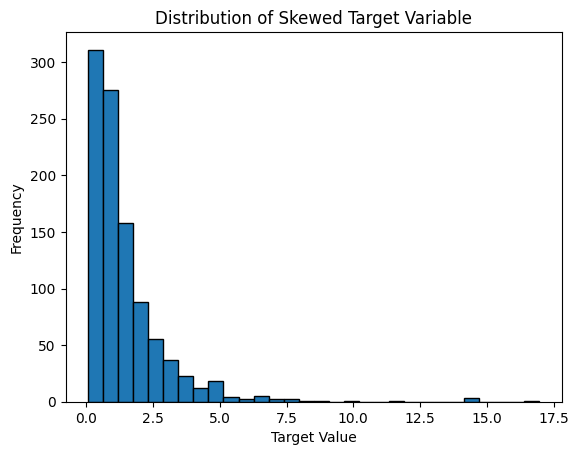

In [95]:
random_seed =np.random.seed(42)
num_samples = 1000

rng = np.random.default_rng(random_seed)
x = rng.normal(0, 1, num_samples)
y = rng.normal(0, 1, num_samples)

z = np.exp(0.7 * x + 0.4 * y + rng.normal(0, 0.4, num_samples))
# introduce skew

data = pd.DataFrame({'x1': x, 'x2': y, 'target': z})

print("created dataset")

plt.hist(data['target'], bins=30, edgecolor='k')
plt.title('Distribution of Skewed Target Variable')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()

X = data[['x1', 'x2']]
y = data['target']

## 2. Fit a Linear Regression without Transformation

First, we'll fit a standard linear regression model without any transformation on the target variable.

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_no_transform = LinearRegression()
model_no_transform.fit(X_train, y_train)
y_pred_no_transform = model_no_transform.predict(X_test)

print("--- Linear Regression without Transformation ---")
print(f"R2 Score: {r2_score(y_test, y_pred_no_transform):.2f}")

--- Linear Regression without Transformation ---
R2 Score: 0.60


## 3. Fit a Linear Regression with Log-Transformation of Target

Next, we'll apply a log transformation to the target variable, fit the model, and then reverse the transformation to evaluate the results.

In [97]:
# Apply log transformation (add a small constant to avoid log(0) if necessary)
y_train_log = np.log(y_train + 1)
y_test_log = np.log(y_test + 1)

model_log_transform = LinearRegression()
model_log_transform.fit(X_train, y_train_log)
y_pred_log_transform = model_log_transform.predict(X_test)

# Reverse the log transformation
y_pred_reversed = np.exp(y_pred_log_transform) - 1 # Subtract 1 to reverse the earlier addition

print("--- Linear Regression with Log Transformation (reversed) ---")
print(f"R2 Score: {r2_score(y_test, y_pred_reversed):.2f}")

--- Linear Regression with Log Transformation (reversed) ---
R2 Score: 0.65


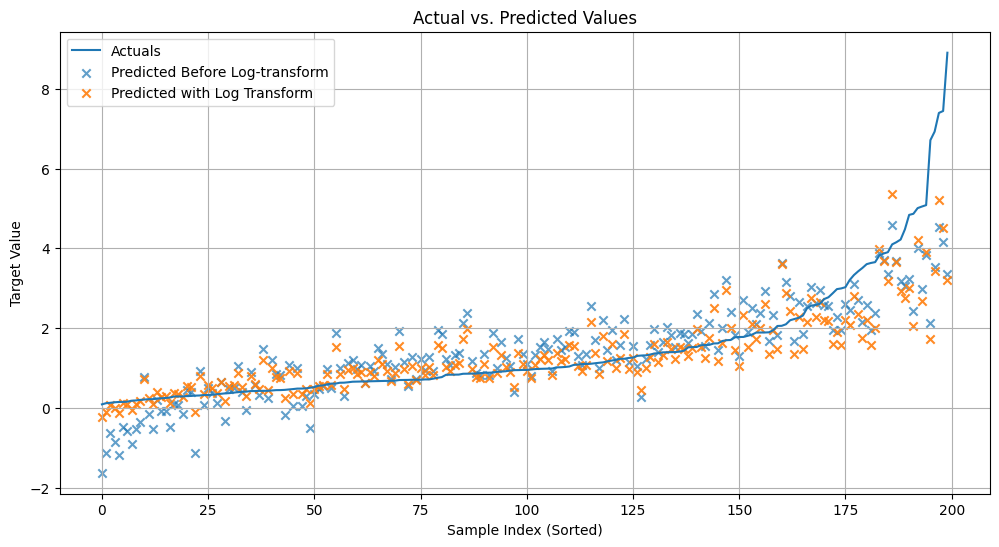

In [98]:
sorted_indices = np.argsort(y_test.values)
y_test_sorted = y_test.values[sorted_indices]
y_pred_no_transform_sorted = y_pred_no_transform[sorted_indices]
y_pred_reversed_sorted = y_pred_reversed[sorted_indices]

plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted, label='Actuals')
plt.scatter(range(len(y_pred_no_transform_sorted)), y_pred_no_transform_sorted, label='Predicted Before Log-transform', alpha=0.7, marker='x') # Scatter plot for predicted
plt.scatter(range(len(y_pred_reversed_sorted)), y_pred_reversed_sorted, label='Predicted with Log Transform', alpha=0.9, marker='x') # Scatter plot for log-transformed predicted

plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index (Sorted)')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()